In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving datasets_180_408_data.csv to datasets_180_408_data (1).csv
User uploaded file "datasets_180_408_data.csv" with length 125204 bytes


In [ ]:
import pandas as pd
import io
data = pd.read_csv('datasets_180_408_data.csv')
data.head

<bound method NDFrame.head of            id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]>

Benign 357
Malignanat 212


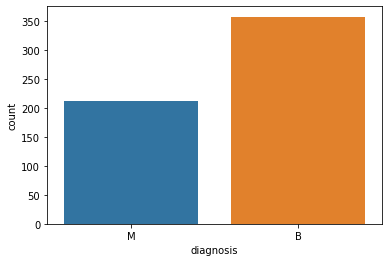

In [ ]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'],label = 'count')
B,M = data['diagnosis'].value_counts()
print('Benign',B)
print('Malignanat',M)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Deleting NaN column
del data['Unnamed: 32']

In [ ]:
X = data.iloc[:,2:].values
y = data.iloc[:,1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1= LabelEncoder()
y = labelencoder_X_1.fit_transform(y)




In [ ]:
#Splittting the dataset into the training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [ ]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [ ]:
###Install Keras

In [ ]:
#!pip install keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#adding the input and first hidden layer

classifier = Sequential()
classifier.add(Dense(kernel_initializer = 'uniform', activation = 'relu',input_dim = 30,units = 16   ))  #output_dim(units) = input /output

#adding the second hidden layer
classifier.add(Dense(kernel_initializer = 'uniform', activation = 'relu',units = 16   ))


#adding the output layer
classifier.add(Dense(kernel_initializer = 'uniform', activation = 'relu',units = 1   ))


In [ ]:
classifier.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
classifier.fit(X_train,y_train,batch_size=100,epochs=150)

Epoch 1/150
5/5 [==============================] - 0s 2ms/step - loss: 2.2481 - accuracy: 0.6374
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 1.6768 - accuracy: 0.6374
Epoch 3/150
5/5 [==============================] - 0s 1ms/step - loss: 1.4905 - accuracy: 0.6374
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 1.3640 - accuracy: 0.6374
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 1.2476 - accuracy: 0.6374
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 1.1463 - accuracy: 0.6374
Epoch 7/150
5/5 [==============================] - 0s 1ms/step - loss: 1.0525 - accuracy: 0.6374
Epoch 8/150
5/5 [==============================] - 0s 1ms/step - loss: 0.9667 - accuracy: 0.6374
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.8856 - accuracy: 0.6374
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 0.8097 - accuracy: 0.6374
Epoch 11/150
5/5 [===========

In [ ]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [ ]:
#predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
#making confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[66,  1],
       [ 2, 45]])

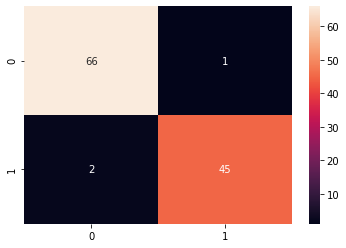

In [ ]:
sns.heatmap(cm,annot=True)
plt.savefig("h.png")

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [ ]:
print("accuracy is :", acc)

accuracy is : 0.9736842105263158
